In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
BOOZST_DATA_DIR = "./data-collector/data/boozt"
ZALANDO_DATA_DIR = "./data-collector/data/zalando"

In [3]:
boozt_df = pd.read_csv(f"{BOOZST_DATA_DIR}/metadata.csv")
boozt_df = boozt_df.query("label != 2")
boozt_df.head()

,image_url,label
0,a8368405d6b25865783b18dced852526.jpg,0
1,5cf8499be87c3d1f5853a09822686ace.jpg,0
2,6dc99c2a6813a637f9b7387f135823e3.jpg,0
3,e38af2775aadcf60dc10f09ea977054d.jpg,0
4,d618bf7ad0faa07cca1311de6bfbf2e0.jpg,0


In [4]:
train_df, test_df = train_test_split(boozt_df, test_size=0.2, stratify=boozt_df["label"])

In [5]:
def load_image(image_path):
    img = Image.open(image_path).resize((128, 128))
    return np.asarray(img).flatten()

boozt_train_images = np.array([load_image(f"{BOOZST_DATA_DIR}/{row.image_url}") for i, row in train_df.iterrows()])
boozt_train_labels = [row.label for i, row in train_df.iterrows()]

boozt_test_images = np.array([load_image(f"{BOOZST_DATA_DIR}/{row.image_url}") for i, row in test_df.iterrows()])
boozt_test_labels = [row.label for i, row in test_df.iterrows()]

In [6]:
# sse = []
# list_k = list(range(1, 10))

# for k in list_k:
#     km = KMeans(n_clusters=k)
#     km.fit(boozt_train_images)
#     sse.append(km.inertia_)

# # Plot sse against k
# plt.figure(figsize=(6, 6))
# plt.plot(list_k, sse, '-o')
# plt.xlabel(r'Number of clusters *k*')
# plt.ylabel('Sum of squared distance');

In [7]:
n_clusters = 7

In [8]:
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(boozt_train_images)

/home/anders/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [9]:
test_images = boozt_test_images

predictions = kmeans.predict(test_images)
predictions

array([6, 5, 1, 6, 5, 6, 1, 1, 0, 4, 4, 5, 5, 5, 1, 4, 5, 5, 4, 4, 5, 6,
       6, 5, 6, 6, 6, 5, 1, 2, 1, 4, 2, 6, 1, 2, 0, 6, 1, 5, 0, 5, 2, 4,
       1, 5, 4, 6, 2, 2, 5, 5, 6, 5, 4, 2, 6, 3, 2, 2, 2, 6, 2, 2, 0, 5,
       0, 5, 4, 4, 6, 2, 0, 1, 2, 0, 0, 2, 3, 2, 1, 5, 0, 5, 5, 0, 5, 4,
       1, 4, 5, 1, 4, 2, 1, 2, 2, 1, 4, 6, 0, 2, 0, 2, 0, 1, 5, 4, 6, 2,
       5, 2, 5, 4, 2, 2, 2, 2, 1, 4, 0, 4, 4, 5, 1, 5, 0, 1, 6, 4, 5, 0,
       6, 5, 1, 4, 0, 2, 2, 0, 5, 2, 1, 2, 1, 1, 2, 2, 0, 4, 6, 0, 5, 5,
       6, 2, 5, 5, 2, 0, 5, 2, 6, 2, 2, 0, 5, 6, 2, 6, 6, 0, 5, 5, 6, 4,
       6, 5, 4, 2, 5, 5, 5, 1, 2, 5, 2, 2, 4, 4, 4, 5, 0, 6, 2, 0, 5, 5,
       1, 5, 4, 0, 6, 1, 5, 1, 5, 2, 5, 0, 5, 4, 1, 4, 0, 0, 2, 5, 5, 2,
       5, 2, 2, 1, 2, 1, 2, 2, 5, 5, 5, 6, 5, 2, 0, 6, 4, 2, 5, 6, 4, 5,
       0, 5, 4, 2, 0, 2, 4, 1, 5, 6, 3, 2, 1, 0, 5, 5, 5, 6, 1, 5, 6, 5,
       6, 1, 5, 2, 2, 4, 3, 4, 2, 6, 5, 4, 6, 0, 2, 5, 6, 1, 0, 1, 0, 5,
       2, 1, 6, 0, 0, 2, 6, 5, 6, 5, 1, 0, 2, 6, 0,

In [10]:
classes = {}
for i in range(0, n_clusters):
    classes[i] = [(boozt_test_images[j], prediction) for j, prediction in enumerate(predictions) if prediction == i]

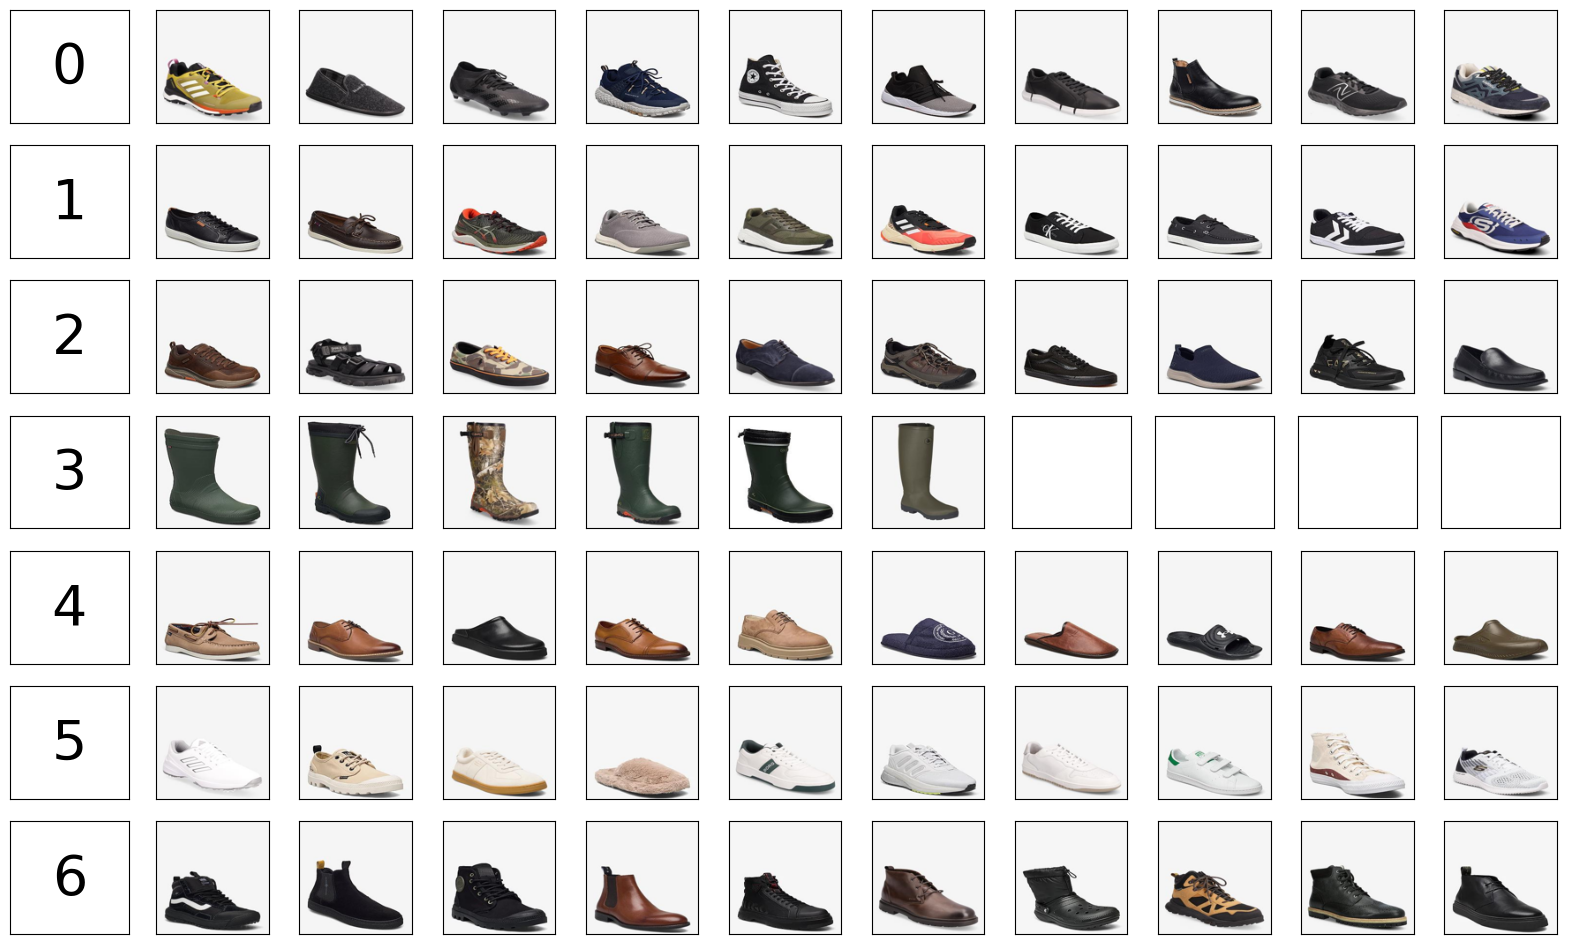

In [40]:
fig, axs = plt.subplots(n_clusters, 11, figsize=(20, 12))

for row in axs:
    for col in row:
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)

for i in range(0, n_clusters):
    axs[i, 0].text(0.35, 0.35, str(i), size=40)
    for j, prediction in enumerate(classes[i][:10]):
        image, prediction = prediction
        axs[i, j+1].imshow(image.reshape((128, 128, 3)))